# ***About dataset***
* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.
* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# ***Exploratory Data Analysis:***

#### Data cleaning:
* For data cleaning we are going use of 2 Python libraries:-
1. Numpy
2. Pandas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
data=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [3]:
#Gives the information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
# Count of types of data type
data.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [5]:
#Showabss the total number of rows and columns present in the data set
data.shape
#There are 550068 rows and 12 columns present in data set before cleaning.

(550068, 12)

In [6]:
#Shows the names of columns present in the data set
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
#Shows the range of index
data.index

RangeIndex(start=0, stop=550068, step=1)

#### NAN values in Dataset:-

In [8]:
#Findind out null values in each columns
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

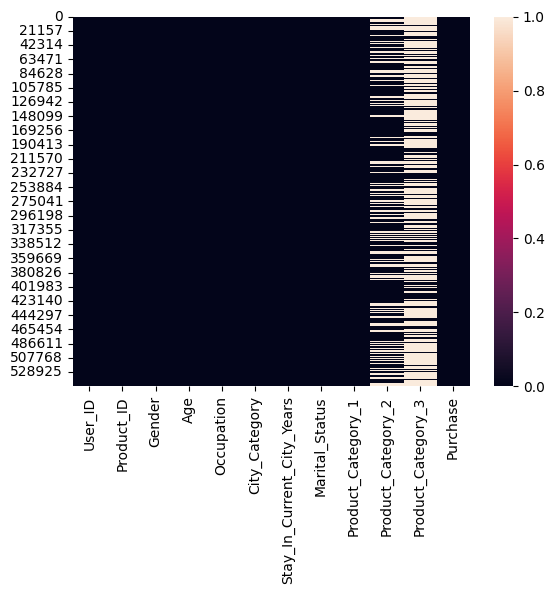

In [9]:
sns.heatmap(data.isnull())
plt.show()

Heatmap shows that null values are present in columns:
1. Product_Category_2
2. Product_Category_3

In [10]:
#Findind out null values in total dataset
data.isnull().sum().sum()

556885

#### Duplicates in Dataset:-

In [11]:
#Checking for duplicates
data.duplicated().sum()

0

#### Renaming the Columns:-
* Changing the names of the columns for better understanding.


In [12]:
data.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'maritial','Stay_In_Current_City_Years':'city'},inplace=True)
data.head(3)

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


### Droping out Unnecessary Columns:-
* Here we are going to drop product 3 coloumn so the visualization and cleaning becomes easy.

In [13]:
data.drop(['ProductID'],inplace=True,axis='columns')

In [14]:
data.head(3)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422


### ***Cleaning individual columns:-***

#### Column: City

In [15]:
data['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

data['city']=data['city'].apply(cities)

In [17]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


#### Column: UserID

In [19]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [20]:
data['UserID'].dtype

dtype('int64')

#### Column: Gender

In [21]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
data.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4,0,8,NaN,NaN,7969


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


#### Column: Age

In [24]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
data['Age']=data['Age'].apply(ages)

* Over here we have replaced the age groups according to the categories.
* We have replaced numerical data into categorical data.
* The types of categories are: child,adult,teenage and old.
1. 0-17 -> child
2. 18-25 -> teenage
3. 26-35 -> adult
4. 36-45 -> adult
5. 46-50 -> adult
6. 51-55 -> old
7. 55+ -> old

In [26]:
data['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [27]:
data.head(6)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,old,16,C,4,0,8,NaN,NaN,7969
5,1000003,M,adult,15,A,3,0,1,2.0,NaN,15227


#### Column: Occupation

In [28]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [29]:
data['Occupation'].dtype

dtype('int64')

#### Column: City Category

In [30]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

#### Column: Maritial Status

In [31]:
data['maritial'].unique()

array([0, 1])

In [32]:
data['maritial'].dtype

dtype('int64')

* There's nothing to change in this column.
1. Here married status -> 1
2. Whereas single status -> 0

In [33]:
data[['UserID','maritial']].tail()

,UserID,maritial
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


#### Column: Product1

In [34]:
data['product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [35]:
data['product1'].dtype

dtype('int64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


#### Column: Product2

In [37]:
data['product2'].value_counts()

product2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [38]:
#removing the percentage of null data in product2
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357

In [39]:
#removing the mode of product 2
s=data.groupby('Age')['product2'].agg(pd.Series.mode)
s

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product2, dtype: float64

In [40]:
for key in s.index:
    data.loc[(data['Age']==key) & (data['product2'].isnull()), 'product2']=s[key]

In [41]:
data['product2'].isnull().sum()

0

#### Column: Product3

In [42]:
data['product3'].value_counts()

product3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [43]:
#removing the percentage of null data in product3
(data['product3'].isnull().sum() / len(data)) * 100

69.67265865311198

In [44]:
#removing the mode of product 3
p=data.groupby('Age')['product3'].agg(pd.Series.mode)
p

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: product3, dtype: float64

In [45]:
for key in p.index:
    data.loc[(data['Age']==key) & (data['product3'].isnull()), 'product3']=p[key]

In [46]:
data['product3'].isnull().sum()

0

### ***After Cleaning & Checking the Data:-***

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [48]:
data.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
city             0
maritial         0
product1         0
product2         0
product3         0
Purchase         0
dtype: int64

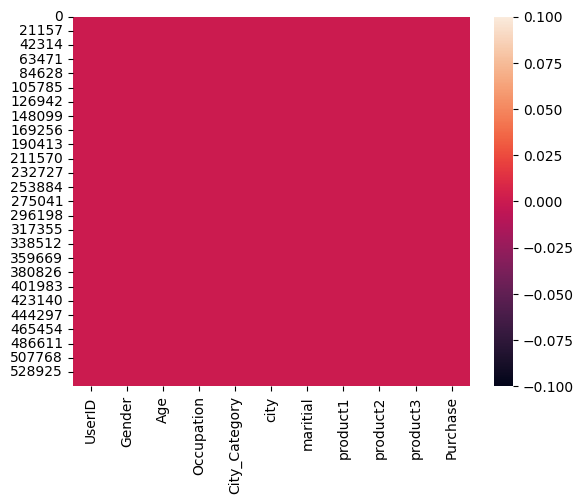

In [49]:
sns.heatmap(data.isnull())
plt.show()

**The heat map shows that there is no null value present in data set.**

# ***Data Visualization***
* For data visualization we are going to use two python libraries.
1. Seaborn
2. Matplotlib

<Axes: title={'center': 'age vs purchase'}, xlabel='Age', ylabel='Purchase'>

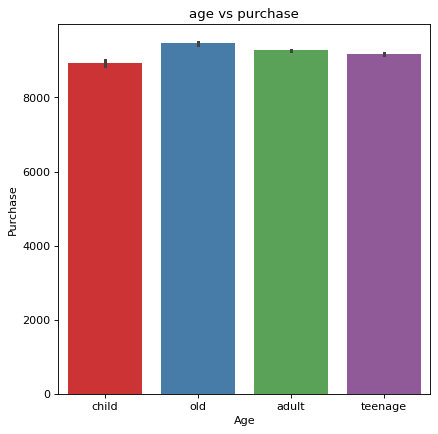

In [50]:
# Age vs purshased
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')

* Here we understood that the purchase rate of old age is ids highest and the lowest rate is of child.

ValueError: could not convert string to float: 'A'

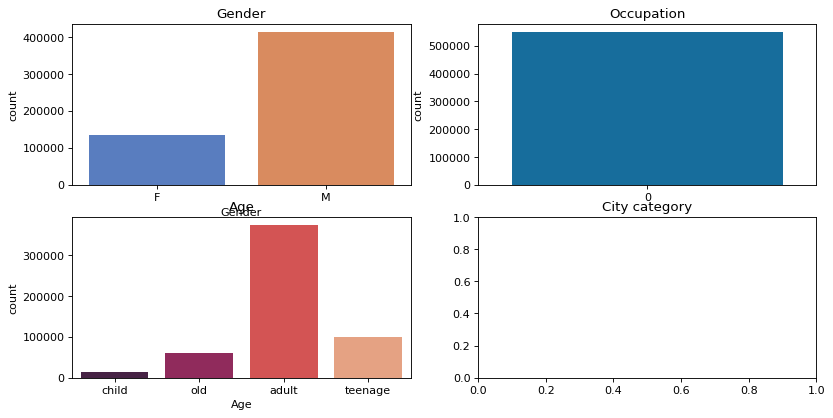

In [51]:
# Visualizing individual column 
plt.figure(figsize=(12,12),dpi=80)
plt.subplot(4,2,1)
plt.title('Gender')
sns.countplot(x='Gender',data=data,palette='muted')

plt.subplot(4,2,3)
plt.title('Age')
sns.countplot(x='Age',data=data,palette='rocket')

plt.subplot(4,2,2)
plt.title('Occupation')
sns.countplot(data['Occupation'],palette='colorblind')

plt.subplot(4,2,4)
plt.title('City category')
sns.countplot(data['City_Category'],palette='crest')

plt.subplot(4,2,5)
plt.title('City')
sns.countplot(data['city'],palette='coolwarm')

plt.subplot(4,2,6)
plt.title('Maritial')
sns.countplot(data['maritial'],palette='hot')

ax=plt.subplot(4,2,8)
plt.title('Purchase')
ax.set_ylim(0,0.00015)
ax.set_xlim(0,26000)
sns.kdeplot(data['Purchase'])

plt.subplot(4,2,7)
plt.title('Product1')
sns.countplot(data['product1'],palette='viridis')

plt.tight_layout()
plt.show()

**Gender:-**
* The graph shows that count of male is more than female.
* Male count=4000
* Female count=1500

**Age:-**
* The graph shows that pepople visiting the store are maximum adults.
* Adult age ranges from 26-50
* Where as least visited are children.

**Maritial:-**
* People visting the store are married and has higher count as compared to singles.
* Married count = 3,00,000
* Single count=2,00,000

**Purchase:-**
* Purchase rate is higher between 5000 - 10,000
* Purchase rate goes upto range 25,0000

**City category:-**
* People visiting the store maximum belong to city category B.
* Least visiting people visiting the store belong to category A.

**City:-**
* Maximum people visiting the store belong to 1.
* Least visited is city 0.
* By this we can conclude that the store is located in city 1.

In [ ]:
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='maritial',y='Purchase',hue='Gender',data=data,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=data,x='City_Category',y='Purchase',hue='Gender',palette='Purples')

plt.tight_layout()
plt.show()

* By these 3 ploted graph we conclude that male has higher purchase rate than female
* male > female(purchase)

In [ ]:
# Plotting purchase vs product1
plt.figure(figsize=(8,8),dpi=80)
plt.title('maritial status vs purchase')
sns.barplot(x='maritial',y='Purchase',data=data,palette='dark',hue='Age')

* This graph we come to know that purchase rate is more in singles rather than in married.
* In singles purchase rate of old age is higher where as in married purchase rate of old is higher.

In [ ]:
#Age count
a=data.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

* Maximum people visiting the store are from adult category.
* Least people visiting belong to child category.

In [ ]:
#city category
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=data.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

* People visting the store belong to city category B.
* Least visiting belong to city A.

In [ ]:
#Plotting products vs purchase rate
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(2,2,1)
plt.title('product1 vs purchase')
sns.barplot(x='product1',y='Purchase',data=data)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('product2 vs purchase')
sns.barplot(x='product2',y='Purchase',data=data)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('product3 vs purchase')
sns.barplot(x='product3',y='Purchase',data=data)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

* In this graph of product1 and product2 the 10th product is more purchased.
* In product3 3rd product is more purchased compared to all.

In [ ]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
um=data[data['maritial']==0].value_counts('Purchase')
plt.title('Unmarried')
sns.kdeplot('Purchase',data=um)

plt.subplot(1,2,2)
m=data[data['maritial']==1].value_counts('Purchase')
plt.title('Married')
sns.kdeplot('Purchase',data=m)

plt.tight_layout()
plt.show()

Purchase distribution of both 'Married' and 'UnMarried' customers are quitely same.

In [ ]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
f=data[data['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot('Purchase',data=f)

plt.subplot(1,2,2)
ma=data[data['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot('Purchase',data=ma)

plt.tight_layout()
plt.show()

Purchase distribution of both 'Male' and 'Female' customers are quitely same.

# ***Conclusion:-***

In the Given dataset. I explored and learned many things like,
How to fill NaN values.
Where we can use the concept of code reusability.
In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data and created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve it by visualizing and applying conditions.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. By seeing this EDA we can fulfill this requirements.

